1. Framing the problem
This problem aims to develop a predictive model to estimate disease progression in diabetes based on their baseline characteristics.

We can use supervised learning model since the dataset contains labeled data and also we can train it on historic data and use it to make predictions on new patient data.

Dataset contain 442 diabetes patient, where each patient is described by age, sex, body mass index, average blood pressure, and six blood serum measurements along with a quantitative measure of disease progression one year after baseline.

2. Get the Data
Import necessary libraries

In [37]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import plotly.express as px

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error

Loading diabetes dataset

In [38]:
# Load the diabetes data
diabetes = datasets.load_diabetes()

# Extract the bmi feature  - 3rd feature
bmi = diabetes.data[:,2]  

# Reshaping the bmi feature to 2d array
bmi = bmi.reshape(-1,1)

# Checking the shape
bmi.shape

(442, 1)

3. Explore the data to gain insights
Converting Array into Data Frame

In [40]:
# Converting into DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# Add the target variable
df['Disease_Progression'] = diabetes.target

# View the DataFrame
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [41]:
X = bmi
y = diabetes.target

print("X shape :",X.shape)
print("y shape :",y.shape)

X shape : (442, 1)
y shape : (442,)


Plotting

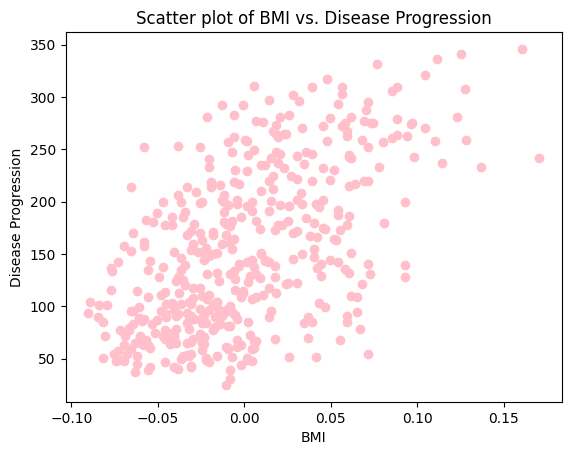

In [54]:
# Scatter plot of BMI vs. Disease Progression
plt.scatter(df['bmi'], df['Disease_Progression'], color="pink")
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Scatter plot of BMI vs. Disease Progression')
plt.show()

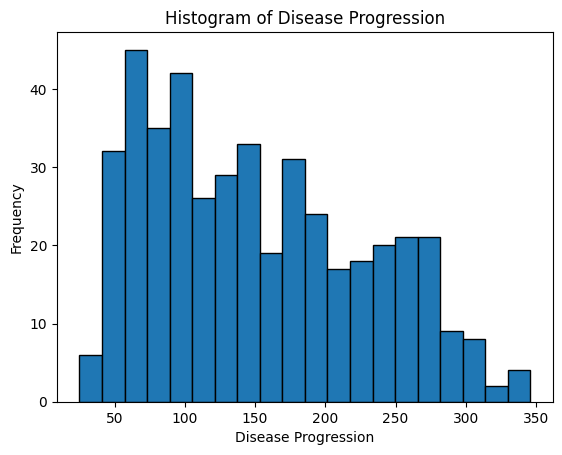

In [43]:
# Histogram of Disease Progression
plt.hist(df['Disease_Progression'], bins=20, edgecolor='black')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.title('Histogram of Disease Progression')
plt.show()

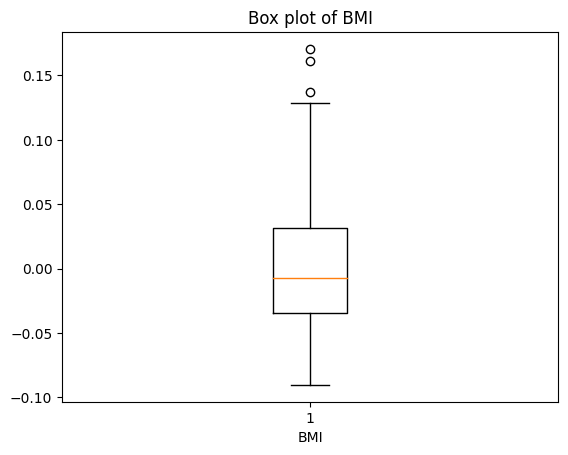

In [44]:
# Box plot of BMI
plt.boxplot(df['bmi'])
plt.xlabel('BMI')
plt.title('Box plot of BMI')
plt.show()

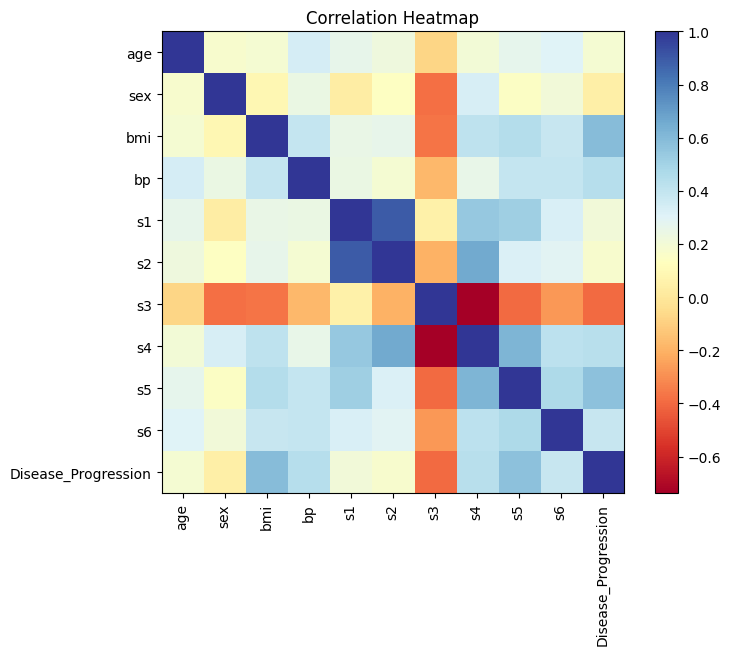

In [45]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='RdYlBu', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(df.columns)), df.columns, rotation=90)
plt.yticks(range(len(df.columns)), df.columns)
plt.title('Correlation Heatmap')
plt.show()

In this Correlation Heatmap, the Dark blue indicates strong negative correlation, while dark red represents strong positive correlation.

6. Developing the Model
Split the data into training and testing sets

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 1)
(89, 1)
(353,)
(89,)


In [47]:
# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

LinearRegression()

7. Presenting the solution

In [48]:
# Making prediction on the test data
y_Pred = model.predict(X_test)
y_Pred[:5]  # Showing 5 predictions

array([145.80622687, 188.85739048, 147.95878505, 203.92529774,
       131.8145987 ])

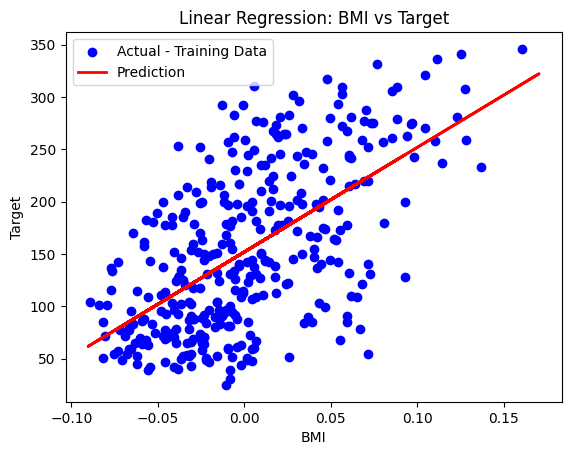

In [49]:
# Plot the scatter plot and linear regression line
plt.scatter(X_train, y_train, color='blue', label='Actual - Training Data')
plt.plot(X_test, y_Pred, color='red', linewidth=2, label='Prediction')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Linear Regression: BMI vs Target')
plt.legend()
plt.show()

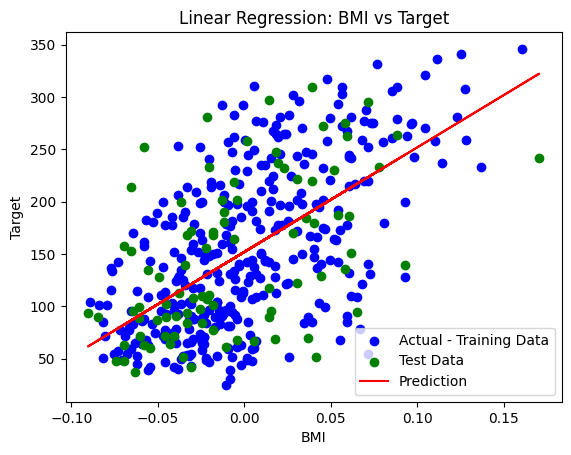

In [50]:
# Plot the scatter plot and linear regression line
plt.scatter(X_train, y_train, color='blue', label='Actual - Training Data')
plt.scatter(X_test, y_test, color='green', label = "Test Data")
plt.plot(X_test, y_Pred, color='red',  label='Prediction')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.title('Linear Regression: BMI vs Target')
plt.legend()
plt.show()

In [51]:
# Making prediction on the train data
y_train_Pred = model.predict(X_train)
y_train_Pred[:5]  # Showing 5 predictions

array([164.10297141, 133.96715688, 201.77273956, 116.74669144,
        86.61087692])

In [52]:
# Get the model's parameters (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

# Calculate the loss (mean squared error) on train and test sets
train_loss = mean_squared_error(y_train, y_train_Pred)
test_loss = mean_squared_error(y_test, y_Pred)

# Report the results
print("Model Parameters:")
print("Slope / Coefficient:", slope)
print("Intercept:", intercept)
print("\nLoss on Train Set:", train_loss)
print("Loss on Test Set:", test_loss)

Model Parameters:
Slope / Coefficient: 998.5776891375593
Intercept: 152.00335421448167

Loss on Train Set: 3854.11265207582
Loss on Test Set: 4061.8259284949268


Loss Functions

In [53]:
# The mean squared error
mse = metrics.mean_squared_error(y_test, y_Pred)
print('Mean squared error: %.2f' % mse)

# The mean absolute error
print("Mean absolue error: %.2f" %metrics.mean_absolute_error(y_test, y_Pred))

Mean squared error: 4061.83
Mean absolue error: 52.26


The model performs slightly worse since, we have taken only one feature and which might be overfitting in some degree or there is limited generalization.